# Desafio Final IGTI - Clusterização 


Autor: __Tiago Dias__

#### 1 – Definição do Problema

Análise e classificação de veículos, do conhecido dataset “cars”. Esse dataset contém um conjunto de informações sobre vários veículos pesquisados. Existem dados, por exemplo, sobre a potência do veículo, sobre a origem e cilindradas cúbicas. 

Para essa análise vamos empregar os conceitos de redução da dimensionalidade com o PCA, clusterização com o K-Means e classificações com algoritmos supervisionados.

#### 2 – Coleta de Dados

Foi disponibilizado um dataset de nome "cars" para resolução do problema.

In [55]:
import pandas as pd

In [56]:
cars = pd.read_csv('cars.csv')
cars.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.


In [57]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [58]:
cars.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [59]:
cars['cubicinches'].values

array(['350', '89', '302', '400', '98', '350', '351', '440', '183', '89',
       '108', '97', '302', '350', '225', '350', '85', '304', '113', '107',
       '86', '121', '200', '351', '89', '91', '71', '351', '250', '98',
       '97', '250', '120', '199', '97', '231', '97', '80', '351', '232',
       ' ', '302', '250', '250', '455', '120', '318', '122', '97', '200',
       '400', '141', '340', '116', '350', '400', '156', '98', '90', '360',
       '232', '108', '168', '86', '318', '250', '97', '91', '97', '305',
       '198', '112', '97', '119', '98', '262', '232', '134', '98', '108',
       '400', '429', '305', '115', '116', '72', '199', '225', '90', '119',
       '86', '119', '350', '250', '98', '231', '350', '250', '318', '250',
       '400', '400', '98', '105', '108', '151', '90', '88', '121', '307',
       '97', '121', '351', '91', '91', '225', '151', '231', '98', '429',
       '101', '79', '400', '156', '97', '140', '360', '105', '114', '98',
       '97', '151', '455', '304', '350'

In [60]:
cars['weightlbs'].values

array(['4209', '1925', '3449', '3761', '2051', '3900', '4363', '4312',
       '3530', '2050', '2245', '2188', '4141', '3664', ' ', '4360',
       '2020', '3433', '2278', '2430', '2019', '2600', '3012', '4054',
       '1968', '1795', '1773', '4657', '3574', '2380', '2130', '3278',
       '2506', ' ', '1985', '3415', '1835', '2720', '3955', '3265',
       '3897', '4638', '3645', '3520', '3086', '2635', '3755', '2395',
       '1940', '3060', '4464', '3190', '3609', '2158', '4380', '4278',
       '2930', '2075', '1937', '3821', '2945', '2379', '2910', '2110',
       '4237', '3525', '1950', '1965', '1825', '3880', '3102', '2640',
       '2288', '2545', '2219', '3015', '3085', '2515', '2265', '2350',
       '4325', '4952', '3425', '2694', '2220', '1613', '2774', '3465',
       '2125', '2720', '1975', '2300', '4100', '3329', '2255', '3907',
       '4499', '3139', '3830', '3781', '4997', '4906', '2126', '2200',
       '2265', '2635', '2335', '2065', '2671', '3504', '2279', '2933',
       '4335

In [61]:
cars['brand'].value_counts()

 US.        162
 Japan.      51
 Europe.     48
Name: brand, dtype: int64

#### 3 – Pré-Processamento


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Localizando e eliminando dados nulos

In [63]:
cubicinches_null = cars.loc[cars['cubicinches'] == ' '].index
cars.drop(index=cubicinches_null, inplace=True)

In [64]:
weightlbs_null = cars.loc[cars['weightlbs'] == ' '].index
cars.drop(index=weightlbs_null, inplace=True)

Convertendo colunas para inteiro

In [65]:
cars['cubicinches'] = cars['cubicinches'].apply(int)
cars['weightlbs'] = cars['weightlbs'].apply(int)

Convertendo dados categóricos

In [66]:
df = pd.get_dummies(cars).copy()
df.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand_ Europe.,brand_ Japan.,brand_ US.
0,14.0,8,350,165,4209,12,1972,0,0,1
1,31.9,4,89,71,1925,14,1980,1,0,0


In [67]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [68]:
df_scaler = scaler.transform(df)
df_scaler

array([[-1.16955986,  1.38259161,  1.35928352, ..., -0.47421554,
        -0.498779  ,  0.78756153],
       [ 1.10918971, -0.91201748, -1.02737459, ...,  2.10874572,
        -0.498779  , -1.26974206],
       [-0.78764653,  1.38259161,  0.92035789, ..., -0.47421554,
        -0.498779  ,  0.78756153],
       ...,
       [-0.1511243 ,  0.23528707,  0.28025802, ..., -0.47421554,
        -0.498779  ,  0.78756153],
       [-0.66034208,  0.23528707,  0.28025802, ..., -0.47421554,
        -0.498779  ,  0.78756153],
       [-0.1511243 ,  0.23528707,  0.44485513, ..., -0.47421554,
        -0.498779  ,  0.78756153]])

In [69]:
pca = PCA(n_components=7)
pca.fit(df_scaler)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
df_pca = pca.transform(df_scaler)
df_pca

array([[ 3.57112178,  0.34855093,  0.67387895, ..., -0.06174425,
         0.24964886,  0.0715923 ],
       [-2.6331804 ,  1.51607754, -0.17493403, ..., -0.95337992,
        -0.00680607, -0.39994006],
       [ 2.83266732,  0.39743607,  0.81655339, ..., -0.87236811,
         0.5311815 , -0.45879161],
       ...,
       [ 0.39896335, -1.07643525, -1.26135624, ..., -0.30812924,
        -0.41399254, -0.21493702],
       [ 1.12001405,  0.36999369, -0.17329044, ..., -0.11145826,
         0.06572908, -0.08935313],
       [ 0.92527103, -0.34268038, -0.63850642, ..., -0.22211307,
         0.06499377, -0.05521589]])

#### 4 – Solução do Problema

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [72]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [73]:
kmeans.labels_

array([2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 0,
       2, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1, 2,
       0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2,
       1, 2, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 0], dtype=int32)

In [74]:
df['kmeans'] = kmeans.labels_
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand_ Europe.,brand_ Japan.,brand_ US.,kmeans
0,14.0,8,350,165,4209,12,1972,0,0,1,2
1,31.9,4,89,71,1925,14,1980,1,0,0,1
2,17.0,8,302,140,3449,11,1971,0,0,1,2
3,15.0,8,400,150,3761,10,1971,0,0,1,2
4,30.5,4,98,63,2051,17,1978,0,0,1,0


In [75]:
df['kmeans'].value_counts()

1    98
0    83
2    75
Name: kmeans, dtype: int64

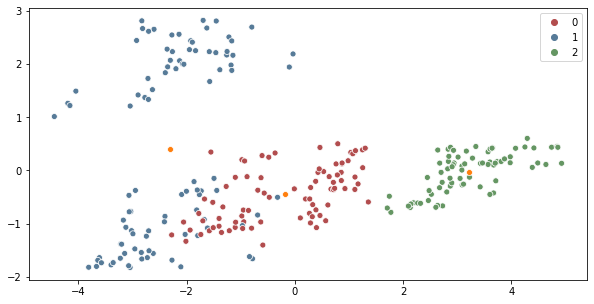

In [114]:
plt.figure(figsize=(10, 5))
x, y = zip(*df_pca[:,:2])
x_, y_ = zip(*kmeans.cluster_centers_[:,:2])
sns.scatterplot(x, y, kmeans.labels_, palette=sns.color_palette("Set1", n_colors=3, desat=.5))
sns.scatterplot(x_, y_, markers=['x']);

#### 5 – Modelo

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
X = df_pca
y = kmeans.labels_

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [79]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [80]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### 6 – Avaliação

In [183]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [82]:
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        19

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



In [83]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        19

    accuracy                           1.00        77
   macro avg       1.00      1.00      1.00        77
weighted avg       1.00      1.00      1.00        77



# Resolução DESAFIO

#### Questão 01

In [116]:
cars = pd.read_csv('cars.csv')
cars.isna().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

Apesar de ter valores em branco em algumas colunas, não há dados nulos no dataset

#### Questão 02

In [118]:
cars['cubicinches'] = pd.to_numeric(cars['cubicinches'], errors='coerce')
cars['weightlbs'] = pd.to_numeric(cars['weightlbs'], errors='coerce')
cars.isna().sum()

mpg            0
cylinders      0
cubicinches    2
hp             0
weightlbs      3
time-to-60     0
year           0
brand          0
dtype: int64

O parametro errors='coerce', converte as observações não numéricas em nulas

#### Questão 03

In [124]:
index_null = cars['cubicinches'].isna()
index_null[index_null.isin([True])].index

Int64Index([40, 180], dtype='int64')

#### Questão 04


In [125]:
cars.isna().sum().sum()

5

#### Questão 05

In [126]:
cars.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [128]:
cars.fillna(cars.mean(), inplace=True)

In [132]:
cars['weightlbs'].mean()

3009.8333333333335

#### Questão 06

In [133]:
cars['mpg'].median()

22.0

#### Questão 07

In [134]:
cars['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

#### Questão 08

In [136]:
cars[['cylinders','mpg']].corr()

,cylinders,mpg
cylinders,1.00000,-0.77671
mpg,-0.77671,1.00000


#### Questão 09

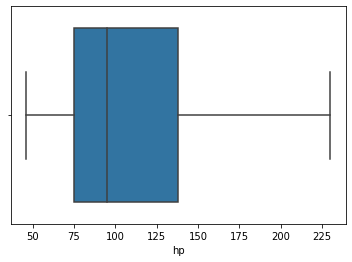

In [137]:
sns.boxplot(x=cars['hp']);

#### Questão 10

In [162]:
scaler = StandardScaler()
scaler_hp = scaler.fit_transform(cars[['hp']])
scaler_hp.max()

3.05870398977614

#### Questão 11

In [167]:
scaler = StandardScaler()
scaler_cars = scaler.fit_transform(cars.iloc[:,:7])

In [169]:
pca = PCA(n_components=7)
pca.fit(scaler_cars)
print(pca.explained_variance_ratio_[0])

0.7237134885896341


#### Questão 12

In [171]:
pca = PCA(n_components=3)
cars_pca = pca.fit_transform(scaler_cars)

In [172]:
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(cars_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [175]:
cars['kmeans'] = kmeans.labels_
cars['kmeans'].value_counts()

2    109
0     77
1     75
Name: kmeans, dtype: int64

#### Questão 13

In [178]:
cars['efficiency'] = cars['mpg'] > 25

In [180]:
X = cars[['cylinders','cubicinches','hp','weightlbs','time-to-60']]
y = cars['efficiency'].values

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

In [182]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.80      0.87        41
        True       0.82      0.95      0.88        38

    accuracy                           0.87        79
   macro avg       0.88      0.88      0.87        79
weighted avg       0.88      0.87      0.87        79



#### Questão 14

In [184]:
print(confusion_matrix(y_test, y_pred))

[[33  8]
 [ 2 36]]


#### Questão 15

In [185]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.86      0.88      0.87        41
        True       0.86      0.84      0.85        38

    accuracy                           0.86        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.86      0.86      0.86        79



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
